In [1]:
import pandas as pd
import numpy as np

# Índices jerárquicos

In [2]:
index = [
    ('California', 2000), 
    ('California', 2010),
    ('New York', 2000),
    ('New York', 2010),
    ('Texas', 2000), 
    ('Texas', 2010),
]

populations = [
    33871648, 
    37253956,
    18976457,
    19378102,
    20851820,
    25145561,
]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [4]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

---

In [5]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [6]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [7]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

---

In [8]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [9]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [10]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Prueba

In [11]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],
    'B': [5, 1, 4, 2, 5, 9],
    'C': [6, 3, 7, 3, 9, 4],
    'D': [0, 7, 3, 7, 1, 7],
})
df

,A,B,C,D
0,1,5,6,0
1,2,1,3,7
2,3,4,7,3
3,4,2,3,7
4,5,5,9,1
5,6,9,4,7


In [12]:
df.set_index(['D', 'A']).drop('C', axis=1)['B']

D  A
0  1    5
7  2    1
3  3    4
7  4    2
1  5    5
7  6    9
Name: B, dtype: int64

In [13]:
df.set_index(['D', 'A'])['B'].sort_index()

D  A
0  1    5
1  5    5
3  3    4
7  2    1
   4    2
   6    9
Name: B, dtype: int64

---

In [14]:
pop_df = pd.DataFrame({
    'total': pop,
    'under18': [
        9267089,
        9284094,
        4687374,
        4318033,
        5906301,
        6879014,
    ],
})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [15]:
f_u18 = pop_df['under18'] / pop_df['total']

In [16]:
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [17]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


---

In [18]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.057947  0.641187
  2  0.749559  0.331969
b 1  0.755403  0.046186
  2  0.766302  0.789559

In [19]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}

pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [20]:
pd.MultiIndex.from_arrays([
    ['a', 'a', 'b', 'b'],
    [1, 2, 1, 2],
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [21]:
pd.MultiIndex.from_tuples([
    ('a', 1),
    ('a', 2),
    ('b', 1),
    ('b', 2),
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [22]:
pd.MultiIndex.from_product([
    ['a', 'b'],
    [1, 2],
])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

---

In [23]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [24]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

---

In [25]:
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]],
    names=['year', 'visit']
)

columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type']
)

In [26]:
data = np.round(np.random.randn(4, 6), 1)

In [27]:
data

array([[-0.2, -1.7, -1.6,  1.8,  0.9,  0.3],
       [-0.2, -0.3,  2.1, -0.9, -2.1,  0.9],
       [-0.8, -0.6, -0. ,  0.3,  0. ,  0.7],
       [ 1. , -0.5,  0.4,  0.7, -0.4, -0.1]])

In [28]:
data[:, ::2]

array([[-0.2, -1.6,  0.9],
       [-0.2,  2.1, -2.1],
       [-0.8, -0. ,  0. ],
       [ 1. ,  0.4, -0.4]])

In [29]:
data[:, ::2] *= 10

In [30]:
data

array([[ -2. ,  -1.7, -16. ,   1.8,   9. ,   0.3],
       [ -2. ,  -0.3,  21. ,  -0.9, -21. ,   0.9],
       [ -8. ,  -0.6,  -0. ,   0.3,   0. ,   0.7],
       [ 10. ,  -0.5,   4. ,   0.7,  -4. ,  -0.1]])

In [31]:
data += 37

In [32]:
data

array([[35. , 35.3, 21. , 38.8, 46. , 37.3],
       [35. , 36.7, 58. , 36.1, 16. , 37.9],
       [29. , 36.4, 37. , 37.3, 37. , 37.7],
       [47. , 36.5, 41. , 37.7, 33. , 36.9]])

In [33]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  35.3  21.0  38.8  46.0  37.3
     2      35.0  36.7  58.0  36.1  16.0  37.9
2014 1      29.0  36.4  37.0  37.3  37.0  37.7
     2      47.0  36.5  41.0  37.7  33.0  36.9

In [34]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      21.0  38.8
     2      58.0  36.1
2014 1      37.0  37.3
     2      41.0  37.7

---

In [35]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [36]:
pop['California', 2000]

33871648

In [37]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [38]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [39]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [40]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [41]:
pop[['California','Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

---

In [42]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  35.3  21.0  38.8  46.0  37.3
     2      35.0  36.7  58.0  36.1  16.0  37.9
2014 1      29.0  36.4  37.0  37.3  37.0  37.7
     2      47.0  36.5  41.0  37.7  33.0  36.9

In [43]:
health_data['Guido', 'HR']

year  visit
2013  1        21.0
      2        58.0
2014  1        37.0
      2        41.0
Name: (Guido, HR), dtype: float64

In [44]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      35.0  35.3
     2      35.0  36.7

In [45]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        35.0
      2        35.0
2014  1        29.0
      2        47.0
Name: (Bob, HR), dtype: float64

In [46]:
health_data['Bob', 'HR']

year  visit
2013  1        35.0
      2        35.0
2014  1        29.0
      2        47.0
Name: (Bob, HR), dtype: float64

---

In [47]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  35.3  21.0  38.8  46.0  37.3
     2      35.0  36.7  58.0  36.1  16.0  37.9
2014 1      29.0  36.4  37.0  37.3  37.0  37.7
     2      47.0  36.5  41.0  37.7  33.0  36.9

In [48]:
data_mean = health_data.groupby('year').mean()
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     35.0  36.00  39.5  37.45  31.0  37.6
2014     38.0  36.45  39.0  37.50  35.0  37.3

In [49]:
data_mean.groupby('type', axis=1).mean()

type,HR,Temp
year,,
2013,35.166667,37.016667
2014,37.333333,37.083333


In [50]:
data_mean.T.groupby('type').mean()

year,2013,2014
type,,
HR,35.166667,37.333333
Temp,37.016667,37.083333


# Combinando datos con `concat`

In [51]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

In [52]:
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
x = [[1, 2],
     [3, 4]]

np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

---

In [54]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

---

In [55]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [56]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [57]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [58]:
df1

,A,B
1,A1,B1
2,A2,B2


In [59]:
df2

,A,B
3,A3,B3
4,A4,B4


In [60]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [61]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


---

In [62]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [63]:
df3

,A,B
0,A0,B0
1,A1,B1


In [64]:
df4

,C,D
0,C0,D0
1,C1,D1


In [65]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [66]:
pd.concat([df3, df4])

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


---

In [67]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [68]:
x

,A,B
0,A0,B0
1,A1,B1


In [69]:
y

,A,B
2,A2,B2
3,A3,B3


In [70]:
y.index = x.index

In [71]:
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [72]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [73]:
pd.concat([x, y], verify_integrity=True)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')

---

In [74]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [75]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [76]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [77]:
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [78]:
pd.concat([df5, df6], join='outer')

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [79]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


# Combinando datos con `merge` y `join`

In [80]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR'],
})

df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014],
})

In [81]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [82]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [83]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [84]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [85]:
df4 = pd.DataFrame({
    'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve'],
})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [86]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


---

In [87]:
df5 = pd.DataFrame({
    'group': ['Accounting', 'Accounting',
              'Engineering', 'Engineering',
              'HR', 'HR'],
    'skills': ['math', 'spreadsheets',
               'coding', 'linux',
               'spreadsheets', 'organization'],
})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [88]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [89]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


---

In [90]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [91]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [92]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [93]:
df3 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000],
})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [94]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [95]:
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [96]:
pd.merge(
    df1, df3,
    left_on='employee', 
    right_on='name',
).drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


---

In [97]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [98]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [99]:
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [100]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [101]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


---

In [102]:
df6 = pd.DataFrame({
    'name': ['Peter', 'Paul', 'Mary'],
    'food': ['fish', 'beans', 'bread'],
},columns=['name', 'food'])

df7 = pd.DataFrame({
    'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer'],
}, columns=['name', 'drink'])

In [103]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [104]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [105]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [106]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [107]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [108]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [109]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [110]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [111]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [112]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [113]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [114]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [115]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


# Agregación y agrupamiento

In [116]:
import seaborn as sns

In [117]:
planets = sns.load_dataset('planets')

In [118]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


---

In [119]:
ran = np.random.RandomState(42)

In [120]:
ser = pd.Series(ran.rand(5))

In [121]:
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [122]:
ser.sum()

2.811925491708157

In [123]:
ser.mean()

0.5623850983416314

In [124]:
df = pd.DataFrame({'A': ran.rand(5), 'B': ran.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [125]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [126]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

---

In [127]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [128]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [129]:
planets.dropna().count()

method            498
number            498
orbital_period    498
mass              498
distance          498
year              498
dtype: int64

In [130]:
planets.dropna().sum()

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                          864
orbital_period                                        416217.777994
mass                                                     1249.64138
distance                                                   25929.97
year                                                         999674
dtype: object

---

In [131]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data': range(6),
}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [132]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


---

In [133]:
planets.groupby('method')

In [134]:
planets.groupby('method')['orbital_period']

In [135]:
planets.groupby('method')[['orbital_period']]

In [136]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [137]:
planets.groupby('method')[['orbital_period']].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [138]:
for (method, group) in planets.groupby('method'):
    print(f"{method:30} shape={group.shape}")

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [139]:
planets.groupby('method')['year'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Transit Timing Variations,4.0,2012.500000,1.290994,2011.0,2011.75,2012.5,2013.25,2014.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0


---

In [140]:
planets.groupby('method').agg == planets.groupby('method').aggregate

False

In [141]:
planets.groupby('method').agg(['min', np.median, max])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1    1.0   1     246.360000    631.180000   
Eclipse Timing Variations          1    2.0   2    1916.250000   4343.500000   
Imaging                            1    1.0   4    4639.150000  27500.000000   
Microlensing                       1    1.0   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1    2.0   2       0.240104      0.342887   
Pulsar Timing                      1    3.0   3       0.090706     66.541900   
Pulsation Timing Variations        1    1.0   1    1170.000000   1170.000000   
Radial Velocity                    1    1.0   6       0.736540    360.200000   
Transit                            1    1.0   7       0.355000      5.714932   
Transit Timing Variations          2    2.0   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [142]:
planets.groupby('method').aggregate(['min', np.median, max])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1    1.0   1     246.360000    631.180000   
Eclipse Timing Variations          1    2.0   2    1916.250000   4343.500000   
Imaging                            1    1.0   4    4639.150000  27500.000000   
Microlensing                       1    1.0   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1    2.0   2       0.240104      0.342887   
Pulsar Timing                      1    3.0   3       0.090706     66.541900   
Pulsation Timing Variations        1    1.0   1    1170.000000   1170.000000   
Radial Velocity                    1    1.0   6       0.736540    360.200000   
Transit                            1    1.0   7       0.355000      5.714932   
Transit Timing Variations          2    2.0   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [143]:
planets.dropna().groupby('method').aggregate({
    'mass': 'mean',
    'distance': 'max',
})

,mass,distance
method,,
Radial Velocity,2.511411,354.0
Transit,1.470000,178.0


# Tarea

**1.** Describe la diferencia entre:
- *Time stamp*
- *Time intervals*
- *Time deltas*

¿Qué métodos y funciones tiene Pandas para trabajar con estos conceptos?
Escribe ejemplos ilustrativos.

1: Desambiguación:
- *Time stamp*:
Es una marca o sello temporal. El Time Stamp de UNIX señala el número de segundos transcurridos desde el 1ro de enero de 1970 hasta un momento específico.
En pandas:
timestamp = pd.Timestamp('1983-03-03 03:33:00'). # Fecha de Nacimiento...

- *Time intervals*:
Es un intervalo de tiempo contínuo, o sea, como el tiempo transcurrido entre 2 marcas de tiempo.
En pandas:
intervalo = pd.Interval(pd.Timestamp('2023-07-27'), pd.Timestamp('2025-08-01'), closed='both') # Tiempo que dura la maestría...

- *Time deltas*:
Muy similar a los intervalos, también pueden calcularse a partir de las marcas de tiempo, pero se usan más comunmente para señalar una duración, o sea, igual como diferencias de tiempo pero de forma más discreta, medida en días, meses, años.
En pandas:
timedelta = pd.Timestamp('2023-11-28') - pd.Timestamp('2023-07-27') # Tiempo que llevo en México...

Pandas tiene otros métodos y funciones tales como:
Para convertir objetos a Timestamp:
- pd.to_datetime: pd.to_datetime('2023-07-27')

Para crear un rango de fechas:
- pd.date_range(start='2023-07-27', end='2023-11-28'):

Para acceder a las propiedades de las fechas:
- df['fecha'].dt.day
- df['fecha'].dt.month
- df['fecha'].dt.year

**2.** Escribe ejemplos ilustrativos de la función `datetime` del módulo `datetime`, de la función `parser` del módulo `dateutil` y del método `strftime` de los objetos `datetime`.

- Función `datetime` del módulo `datetime`:

In [11]:
from datetime import datetime

# Como obtener la fecha y hora actual...
fecha_hora = datetime.now()
print(f"Fecha y hora actual: {fecha_hora}")

# Para crear un objeto datetime...
anho = 2023
mes = 11
fecha_datos = datetime(anho, mes, 28, 1, 50)
print(f"Fecha y hora actual: {fecha_datos}")

Fecha y hora actual: 2023-11-28 01:50:44.766429
Fecha y hora actual: 2023-11-28 01:50:00


- Función `parser` del módulo `dateutil`:

In [22]:
from dateutil import parser

# Parsear una cadena de fecha
fecha_parseada = parser.parse("2023-11-28 13:33:00")
print(f"Fecha parseada: {fecha_parseada}")

# Parsear una cadena en un formato específico
fecha_parseada_formato = parser.parse("23-11-2023 13:33", dayfirst=True)
# El parámetro dayfirst = True en ocaciones no hace falta, ya que si es claramente una fecha el método probeblemente detecte eso también...

print(f"Fecha parseada con formato: {fecha_parseada_formato}")

Fecha parseada: 2023-11-28 13:33:00
Fecha parseada con formato: 2023-11-23 13:33:00


- Método `strftime` de los objetos `datetime`:

In [24]:
from datetime import datetime

# Para obtener la fecha y hora actual...
fecha_actual = datetime.now()
print(f"Fecha y hora actual: {fecha_hora}")

# Formatea la fecha como una cadena personalizada...
cadena_formateada = fecha_actual.strftime("%Y-%m-%d %H:%M:%S")
print(f"Fecha formateada: {cadena_formateada}")

Fecha y hora actual: 2023-11-28 01:50:44.766429
Fecha formateada: 2023-11-28 01:59:19


**3.** Revisa los siguientes fragmentos de código y describe qué operaciones trabajan con tiempo y qué hacen estas operaciones.

In [144]:
# !pip install yfinance

In [25]:
import yfinance as yf

In [26]:
# Se utiliza un objeto yf al cual se le pasan 2 cadenas de fechas como argumentos para descargar datos entre estas fechas...
goog = yf.download('GOOG', start = '2004-01-01', end='2016-01-01')

[*********************100%%**********************]  1 of 1 completed


In [27]:
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2015-12-24,37.477501,37.567501,37.331001,37.419998,37.419998,10544000
2015-12-28,37.646000,38.149502,37.476002,38.125500,38.125500,30306000
2015-12-29,38.334499,38.999001,38.321499,38.830002,38.830002,35300000


In [29]:
# Se crea una Serie de pandas que contiene los precios de cierre de estas finanzas y sus fechas...
cprice = goog['Close']
cprice

Date
2004-08-19     2.499133
2004-08-20     2.697639
2004-08-23     2.724787
2004-08-24     2.611960
2004-08-25     2.640104
                ...    
2015-12-24    37.419998
2015-12-28    38.125500
2015-12-29    38.830002
2015-12-30    38.549999
2015-12-31    37.944000
Name: Close, Length: 2863, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

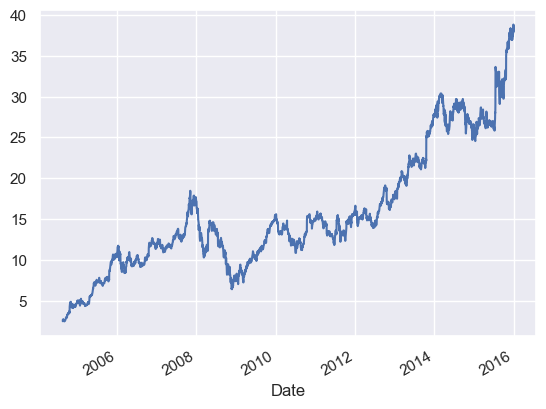

In [33]:
# Se rgafica la serie...
cprice.plot();

In [34]:
# Se utiliza el método resample con argumentos "BA" que agrupan los datos de forma anual, hacia el última día encontrado... seguido se calcula la media anual...
resampled = cprice.resample('BA').mean()
resampled

Date
2004-12-31     3.780860
2005-12-30     6.918047
2006-12-29    10.241246
2007-12-31    13.418465
2008-12-31    11.577904
2009-12-31    10.951161
2010-12-31    13.340574
2011-12-30    14.171237
2012-12-31    16.010401
2013-12-31    22.023519
2014-12-31    27.990164
2015-12-31    30.100284
2016-12-30          NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [35]:
# Se muestra solo el precio final conque cerró cada año... en vez de la media, como en el ejemplo anterior...
freq = cprice.asfreq('BA')
freq

Date
2004-12-31     4.801752
2005-12-30    10.332770
2006-12-29    11.469011
2007-12-31    17.222446
2008-12-31     7.662529
2009-12-31    15.441621
2010-12-31    14.793799
2011-12-30    16.087200
2012-12-31    17.618462
2013-12-31    27.913124
2014-12-31    26.247936
2015-12-31    37.944000
Freq: BA-DEC, Name: Close, dtype: float64

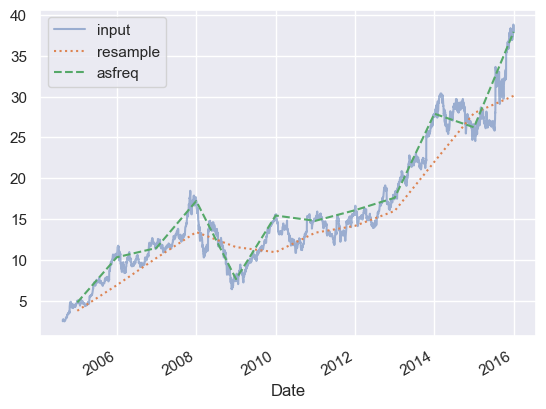

In [153]:
# Acá se grafican los precios por fechas... la media anual, y el valor de cierre anual...
cprice.plot(alpha=0.5, style='-')
resampled.plot(style=':')
freq.plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

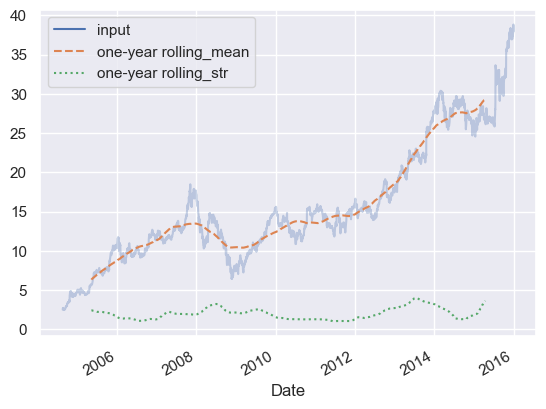

In [154]:
# Se plaica el método de pandas de ventana deslizante, centrada, con intervalo de 365 días...
# Se Grafican la media, desviación estandar y los precios durante el año...
rolling = cprice.rolling(365, center=True)
data = pd.DataFrame({
    'input': cprice,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_str': rolling.std(),
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3);